In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [133]:
x=np.linspace(-5,5,100)
y=np.sqrt(100-x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [134]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

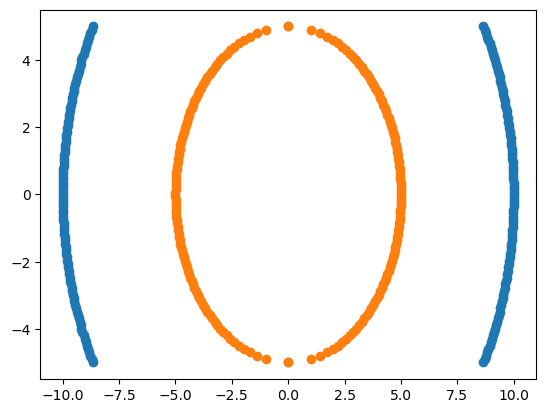

In [135]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [136]:
df1=pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1

In [137]:
df=pd.concat([df1,df2],axis=0)

In [138]:
df['Y'].unique()

array([0, 1], dtype=int64)

In [139]:
df.tail()

,X1,X2,Y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


In [140]:
df['X1_sq']=df['X1']**2
df['X2_sq']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_sq,X2_sq,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [141]:
df.head()

,X1,X2,Y,X1_sq,X2_sq,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X=df[['X1_sq','X2_sq','X1*X2']]
y=df['Y']

In [144]:
Xtr,Xte,ytr,yte=train_test_split(X,y,test_size=0.25,random_state=0)

In [145]:
Xtr.head()

,X1_sq,X2_sq,X1*X2
50,24.997449,0.002551,0.252512
63,98.140496,1.859504,13.508984
112,10.651974,14.348026,-12.362637
159,99.079176,0.920824,9.551676
83,13.549638,11.450362,12.455852


In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
!pip install plotly

In [72]:
import plotly.express as px

In [146]:
df

,X1,X2,Y,X1_sq,X2_sq,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009
...,...,...,...,...,...,...
195,-1.969049,-4.59596,1,3.877155,21.122845,9.049671
196,-1.714198,-4.69697,1,2.938476,22.061524,8.051537
197,-1.406908,-4.79798,1,1.979390,23.020610,6.750316
198,-0.999949,-4.89899,1,0.999898,24.000102,4.898740


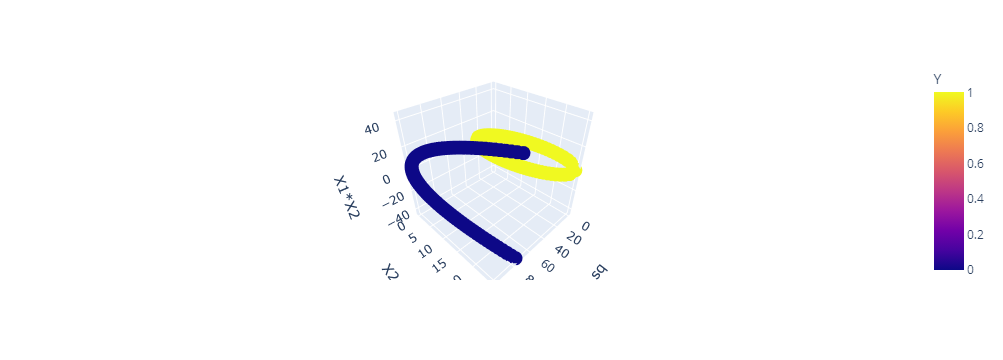

In [147]:
fig=px.scatter_3d(df,x='X1_sq',y='X2_sq',z='X1*X2',color='Y')
fig.show()
plt.show()

In [148]:
from sklearn.svm import SVC

In [149]:
from sklearn.metrics import accuracy_score

In [150]:
svc=SVC(kernel='linear')

In [151]:
svc.fit(Xtr,ytr)

SVC(kernel='linear')

In [152]:
y_pred=svc.predict(Xte)

In [153]:
accuracy_score(y_pred,yte)

1.0

In [154]:
X=df.iloc[:,:2]

In [156]:
df

,X1,X2,Y,X1_sq,X2_sq,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009
...,...,...,...,...,...,...
195,-1.969049,-4.59596,1,3.877155,21.122845,9.049671
196,-1.714198,-4.69697,1,2.938476,22.061524,8.051537
197,-1.406908,-4.79798,1,1.979390,23.020610,6.750316
198,-0.999949,-4.89899,1,0.999898,24.000102,4.898740


In [157]:
y=df.loc[:,'Y']

In [158]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [159]:
Xtr,Xte,ytr,yte=train_test_split(X,y,test_size=0.25,random_state=0)

In [160]:
svc=SVC(kernel='rbf')

In [161]:
svc.fit(Xtr,ytr)

SVC()

In [162]:
y_pred=svc.predict(Xte)

In [163]:
accuracy_score(y_pred,yte)

1.0